In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')
data.head()

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/breast-cancer-wisconsin-data/data.csv'

In [ ]:
data.shape

(569, 33)

# EDA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
if 'Unnamed: 32' in data.columns:
    data.drop(columns=['Unnamed: 32'], inplace=True)

In [ ]:
missing_values = data.isnull().sum()
print("\nMissing Values:\n", missing_values)



Missing Values:
 id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


> now there is no missing values

In [ ]:
duplicates = data.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicates)


Number of Duplicate Rows: 0


> no duplicated rows

In [ ]:
# Distribution of the diagnosis column
print("\nDiagnosis Value Counts:\n", data['diagnosis'].value_counts())


Diagnosis Value Counts:
 diagnosis
B    357
M    212
Name: count, dtype: int64


In [ ]:
# Map diagnosis to numeric values
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

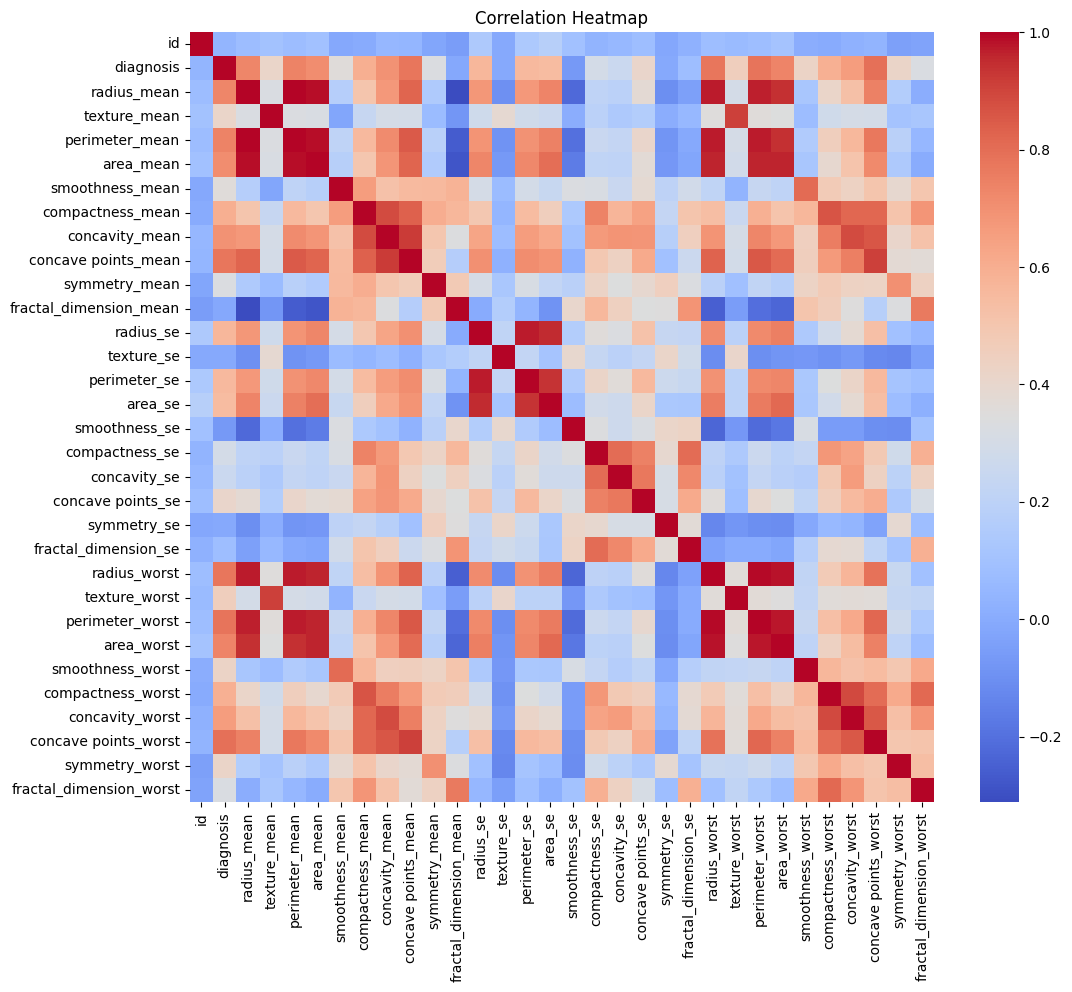

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Correlation with target variable
correlation_with_target = correlation_matrix['diagnosis'].sort_values(ascending=False)
print("\nCorrelation with Diagnosis:\n", correlation_with_target)



Correlation with Diagnosis:
 diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.07797

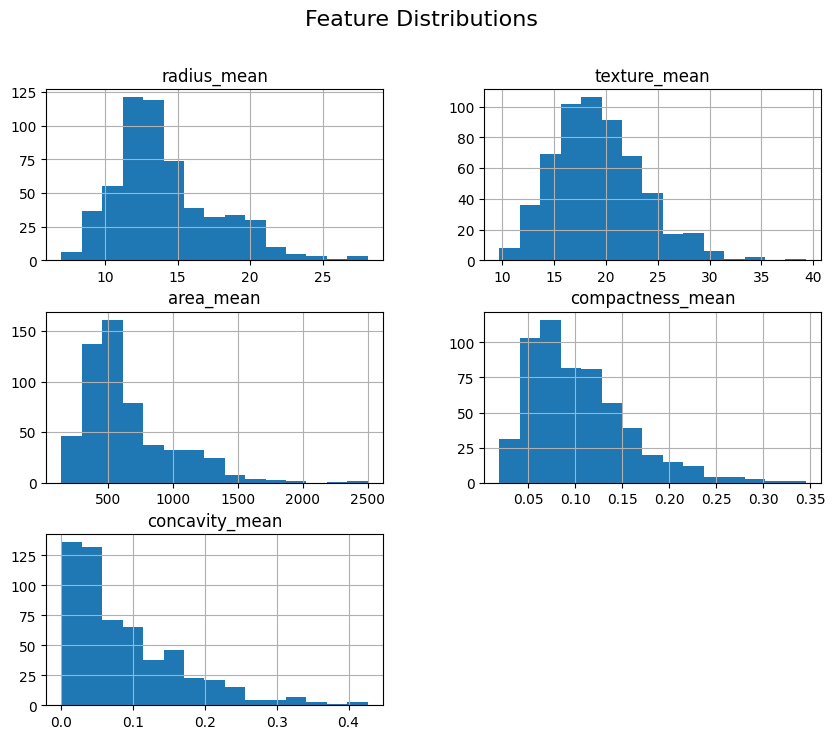

In [ ]:
# Histogram for key features
features = ['radius_mean', 'texture_mean', 'area_mean', 'compactness_mean', 'concavity_mean']
data[features].hist(figsize=(10, 8), bins=15)
plt.suptitle("Feature Distributions", size=16)
plt.show()

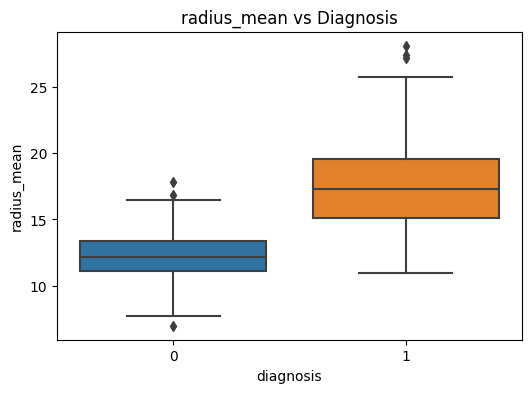

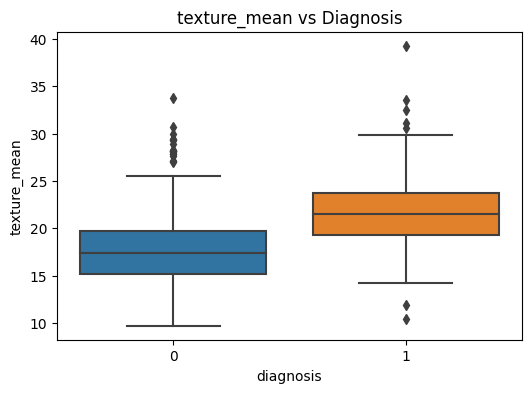

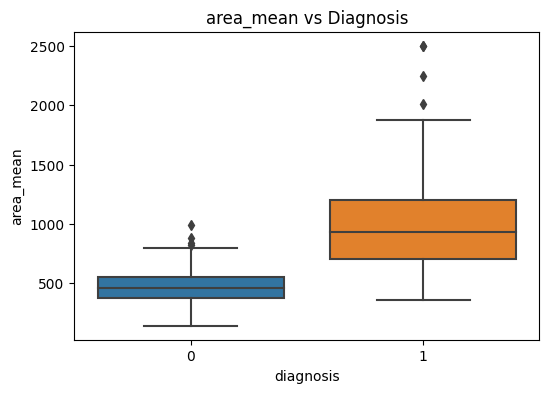

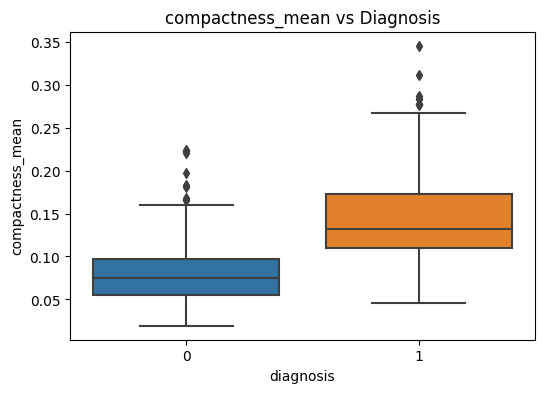

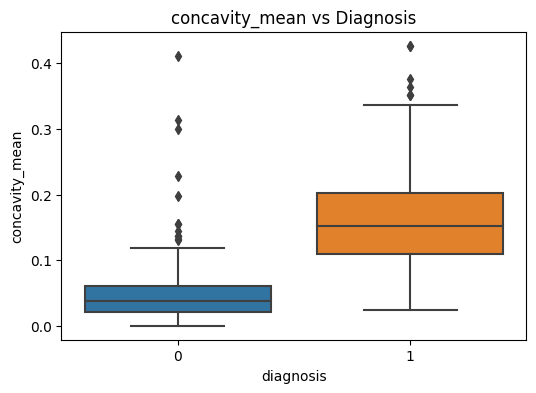

In [ ]:
# Boxplot for selected features
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='diagnosis', y=feature, data=data)
    plt.title(f'{feature} vs Diagnosis')
    plt.show()


> outlier detection

In [ ]:
# Outlier detection using IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()
print("\nNumber of Outliers per Feature:\n", outliers)



Number of Outliers per Feature:
 id                         81
diagnosis                   0
radius_mean                14
texture_mean                7
perimeter_mean             13
area_mean                  25
smoothness_mean             6
compactness_mean           16
concavity_mean             18
concave points_mean        10
symmetry_mean              15
fractal_dimension_mean     15
radius_se                  38
texture_se                 20
perimeter_se               38
area_se                    65
smoothness_se              30
compactness_se             28
concavity_se               22
concave points_se          19
symmetry_se                27
fractal_dimension_se       28
radius_worst               17
texture_worst               5
perimeter_worst            15
area_worst                 35
smoothness_worst            7
compactness_worst          16
concavity_worst            12
concave points_worst        0
symmetry_worst             23
fractal_dimension_worst    24
dtype:

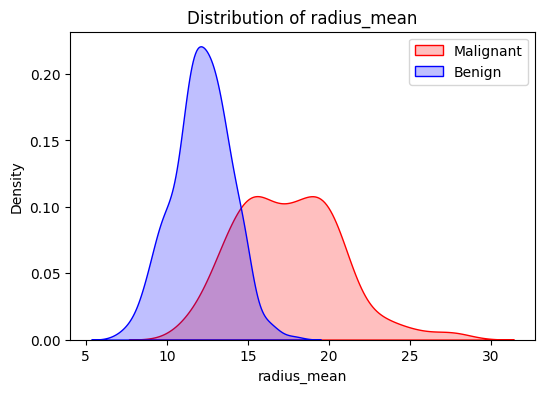

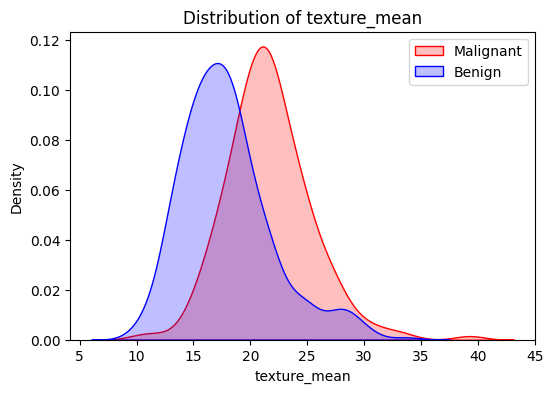

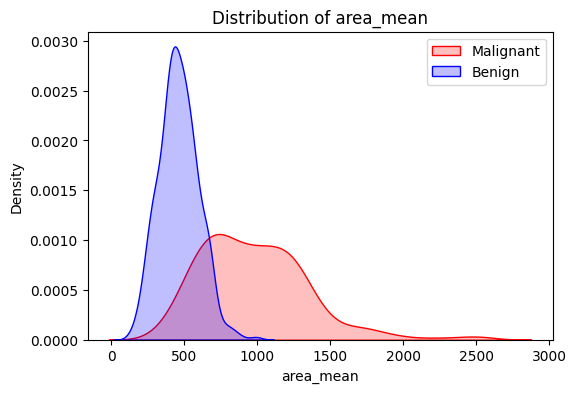

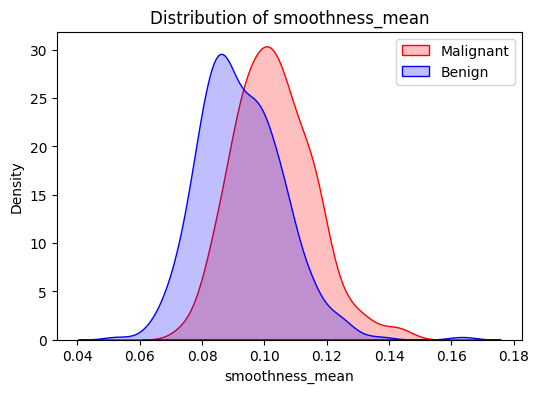

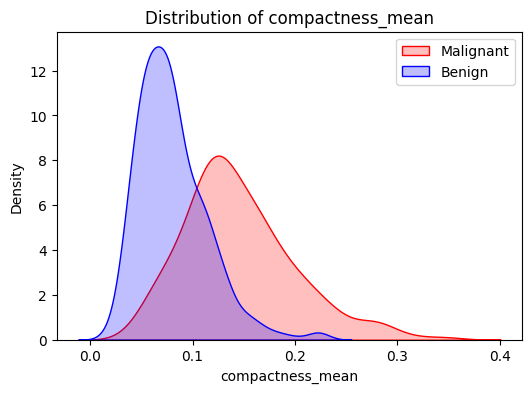

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define features to visualize
key_features = ['radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean', 'compactness_mean']

# Plot KDE for each feature
for feature in key_features:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(data[data['diagnosis'] == 1][feature], label='Malignant', shade=True, color='red')
    sns.kdeplot(data[data['diagnosis'] == 0][feature], label='Benign', shade=True, color='blue')
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.show()


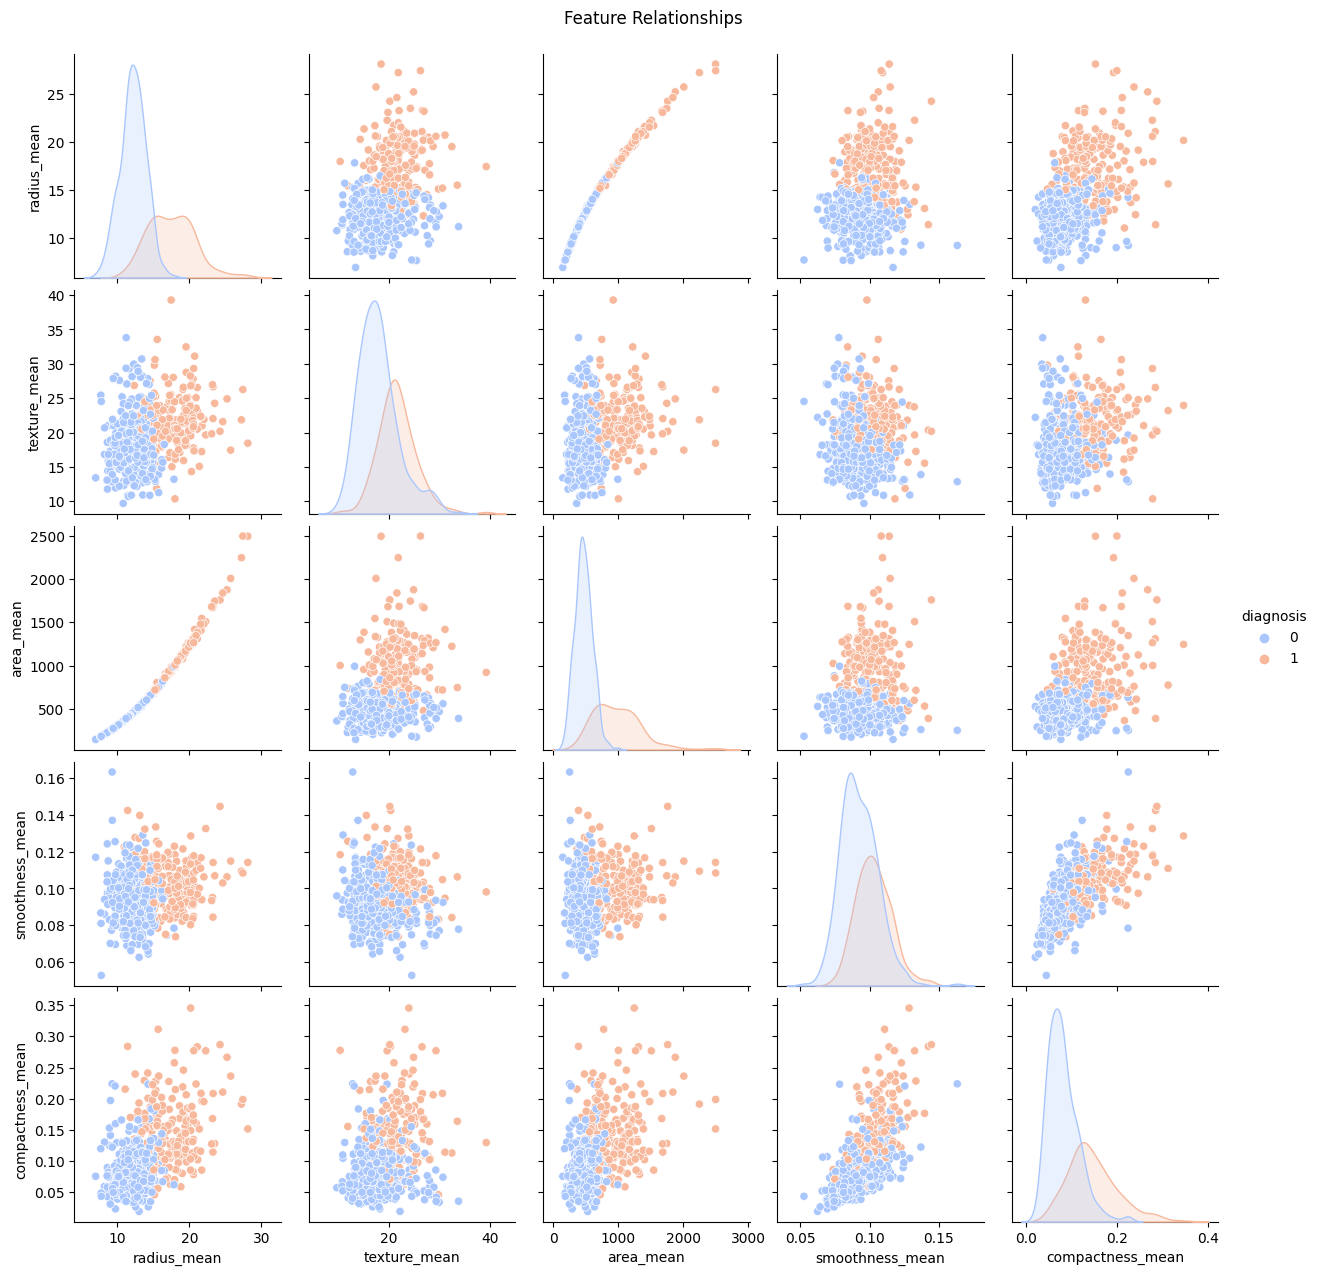

In [ ]:
# Scatter plot matrix for selected features
sns.pairplot(data=data, vars=key_features, hue='diagnosis', palette='coolwarm', diag_kind='kde', height=2.5)
plt.suptitle("Feature Relationships", y=1.02)
plt.show()


In [ ]:
# High correlations with threshold
high_corr_features = correlation_matrix[(correlation_matrix > 0.75) & (correlation_matrix != 1)].stack().reset_index()
high_corr_features.columns = ['Feature1', 'Feature2', 'Correlation']
print("\nHighly Correlated Feature Pairs:\n", high_corr_features)


Highly Correlated Feature Pairs:
                     Feature1                Feature2  Correlation
0                  diagnosis     concave points_mean     0.776614
1                  diagnosis            radius_worst     0.776454
2                  diagnosis         perimeter_worst     0.782914
3                  diagnosis    concave points_worst     0.793566
4                radius_mean          perimeter_mean     0.997855
..                       ...                     ...          ...
109     concave points_worst         perimeter_worst     0.816322
110     concave points_worst       compactness_worst     0.801080
111     concave points_worst         concavity_worst     0.855434
112  fractal_dimension_worst  fractal_dimension_mean     0.767297
113  fractal_dimension_worst       compactness_worst     0.810455

[114 rows x 3 columns]



Top Features Correlated with Diagnosis:
 concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
concavity_worst         0.659610
Name: diagnosis, dtype: float64


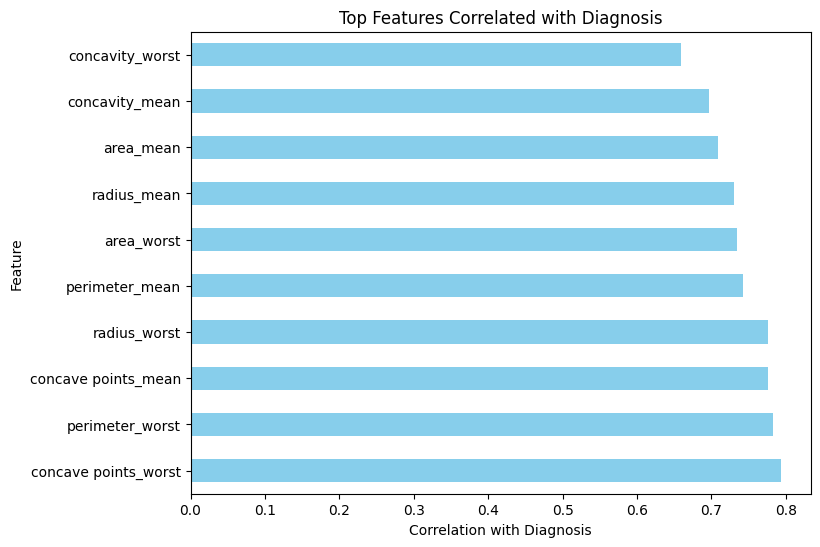

In [ ]:
# Top features based on correlation with diagnosis
top_features = correlation_with_target[1:11]  # Exclude 'diagnosis' itself
print("\nTop Features Correlated with Diagnosis:\n", top_features)

# Visualize top correlations
plt.figure(figsize=(8, 6))
top_features.plot(kind='barh', color='skyblue')
plt.title("Top Features Correlated with Diagnosis")
plt.xlabel("Correlation with Diagnosis")
plt.ylabel("Feature")
plt.show()


# Data Visualization

> # PCA 

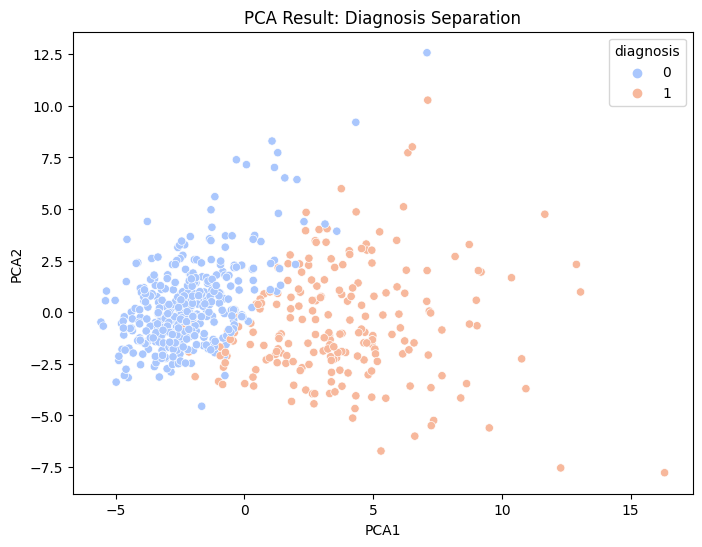

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features
features = data.drop(columns=['id', 'diagnosis'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Create a PCA DataFrame
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
pca_df['diagnosis'] = data['diagnosis']

# Scatter plot of PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='diagnosis', data=pca_df, palette='coolwarm')
plt.title("PCA Result: Diagnosis Separation")
plt.show()


> # TSNE 

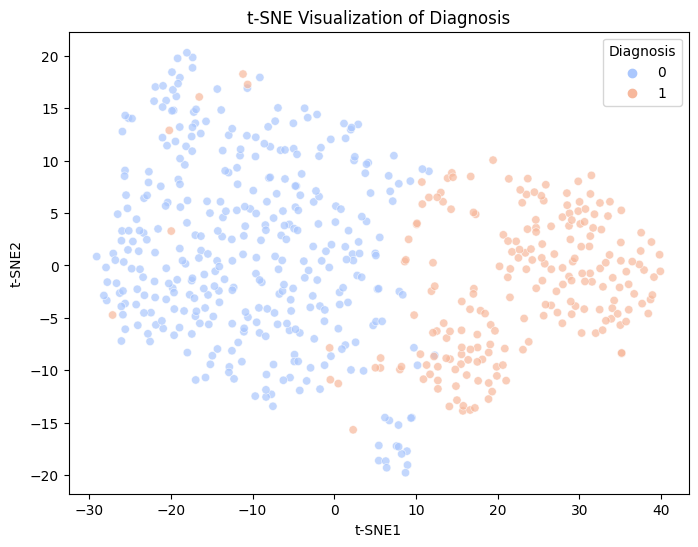

In [ ]:
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_result = tsne.fit_transform(scaled_features)

# Create a DataFrame for visualization
tsne_df = pd.DataFrame(tsne_result, columns=['t-SNE1', 't-SNE2'])
tsne_df['diagnosis'] = data['diagnosis']

# Plot t-SNE results
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tsne_df, x='t-SNE1', y='t-SNE2', hue='diagnosis', palette='coolwarm', alpha=0.7)
plt.title("t-SNE Visualization of Diagnosis")
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
plt.legend(title="Diagnosis", loc="best")
plt.show()


> # UMAP 

In [ ]:
! pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.9 MB/s eta 0:00:00


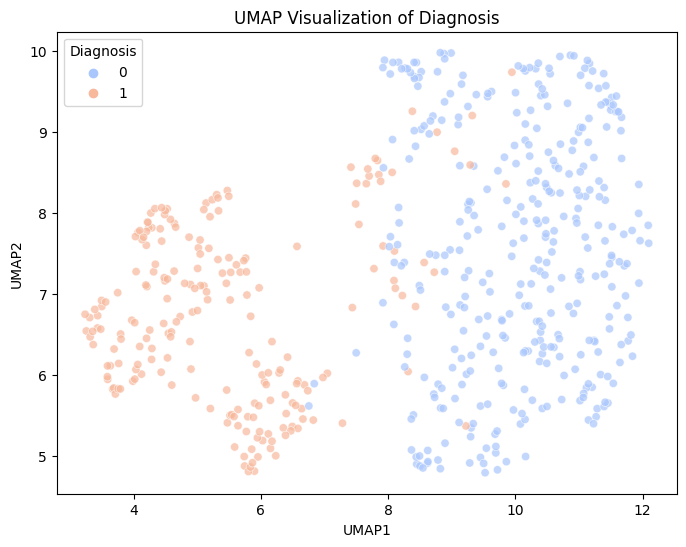

In [ ]:
import umap

# Apply UMAP
umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
umap_result = umap_reducer.fit_transform(scaled_features)

# Create a DataFrame for visualization
umap_df = pd.DataFrame(umap_result, columns=['UMAP1', 'UMAP2'])
umap_df['diagnosis'] = data['diagnosis']

# Plot UMAP results
plt.figure(figsize=(8, 6))
sns.scatterplot(data=umap_df, x='UMAP1', y='UMAP2', hue='diagnosis', palette='coolwarm', alpha=0.7)
plt.title("UMAP Visualization of Diagnosis")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.legend(title="Diagnosis", loc="best")
plt.show()


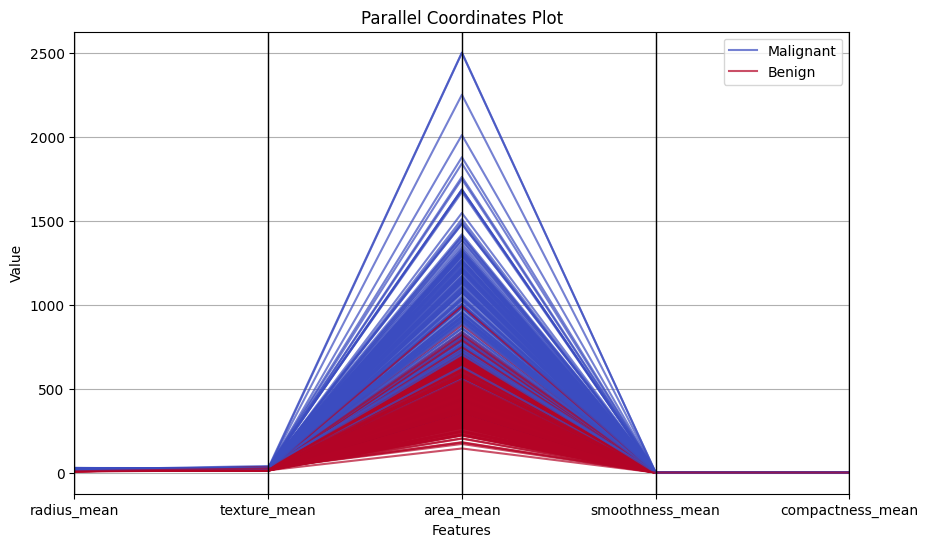

In [ ]:
from pandas.plotting import parallel_coordinates

# Select a subset of features for visualization
subset_features = ['radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean', 'compactness_mean']
parallel_data = data[['diagnosis'] + subset_features]
parallel_data['diagnosis'] = parallel_data['diagnosis'].map({0: 'Benign', 1: 'Malignant'})

# Plot parallel coordinates
plt.figure(figsize=(10, 6))
parallel_coordinates(parallel_data, class_column='diagnosis', colormap='coolwarm', alpha=0.7)
plt.title("Parallel Coordinates Plot")
plt.xlabel("Features")
plt.ylabel("Value")
plt.show()


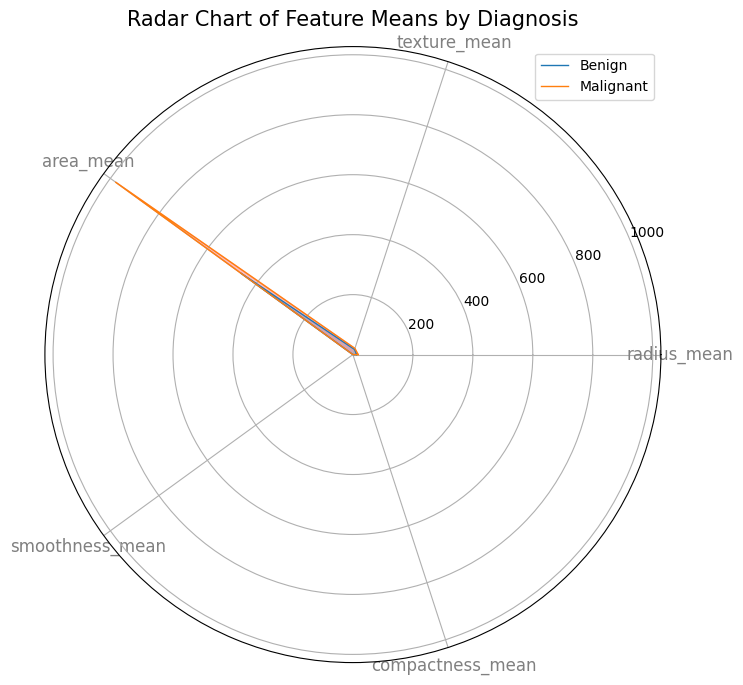

In [ ]:
from math import pi

# Select a subset of features for radar chart
radar_features = ['radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean', 'compactness_mean']
categories = radar_features
num_features = len(categories)

# Compute mean values for each class
benign_means = data[data['diagnosis'] == 0][radar_features].mean()
malignant_means = data[data['diagnosis'] == 1][radar_features].mean()

# Add first value to close the radar chart
benign_means = pd.concat([benign_means, pd.Series(benign_means.iloc[0])], ignore_index=True)
malignant_means = pd.concat([malignant_means, pd.Series(malignant_means.iloc[0])], ignore_index=True)

# Create angles for the radar chart
angles = [n / float(num_features) * 2 * pi for n in range(num_features)]
angles += angles[:1]

# Radar chart plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], categories, color='grey', size=12)

ax.plot(angles, benign_means, linewidth=1, linestyle='solid', label='Benign')
ax.fill(angles, benign_means, alpha=0.25)

ax.plot(angles, malignant_means, linewidth=1, linestyle='solid', label='Malignant')
ax.fill(angles, malignant_means, alpha=0.25, color='red')

plt.title("Radar Chart of Feature Means by Diagnosis", size=15)
plt.legend(loc='upper right')
plt.show()


# Classification

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix:


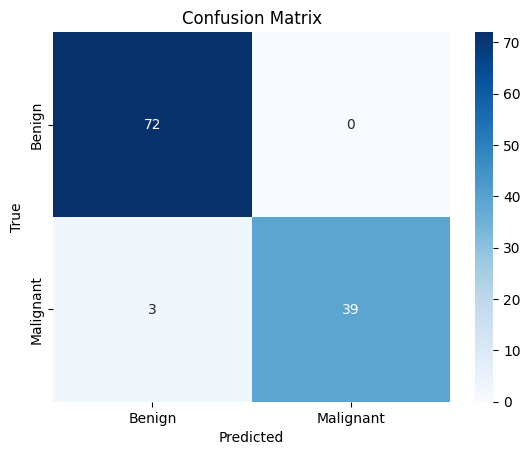

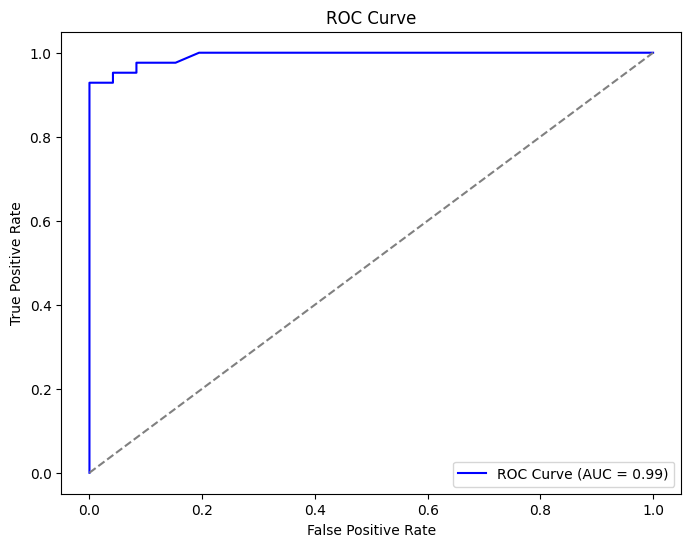

Accuracy: 0.97


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import seaborn as sns

# Step 1: Data Preparation
# Select features (exclude ID and target columns)
features = data.drop(['id', 'diagnosis'], axis=1)
target = data['diagnosis']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, stratify=target)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 2: Model Training
# Use Random Forest Classifier
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Step 3: Evaluation
# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probability for ROC curve

# Classification Report and Confusion Matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ROC-AUC Curve
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


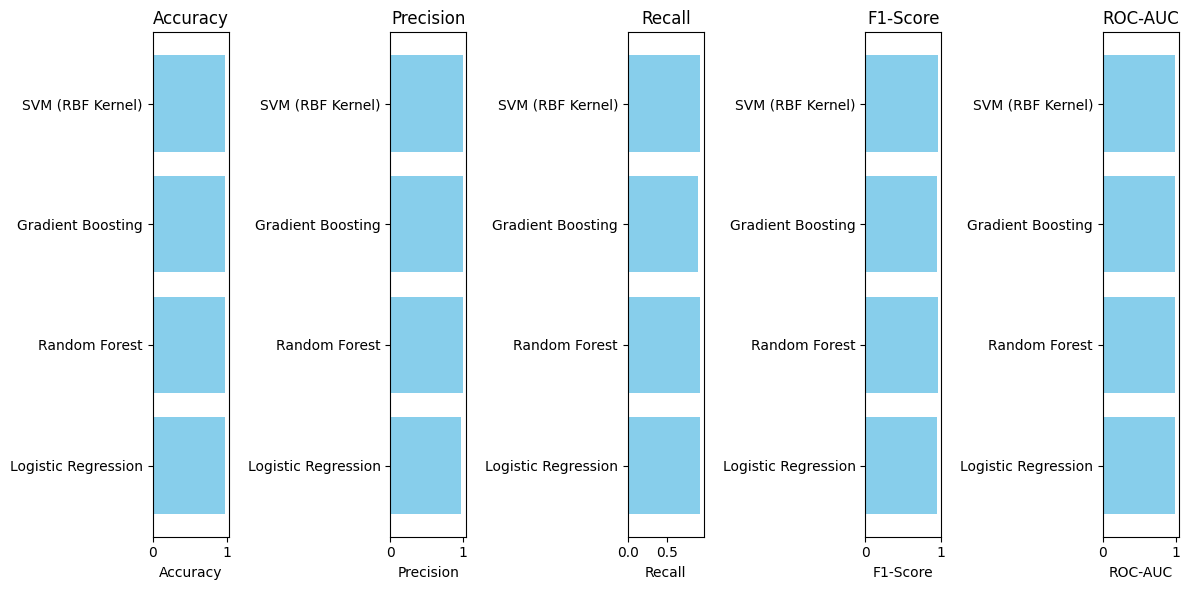

                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression  0.964912      0.975  0.928571  0.951220  0.996032
1        Random Forest  0.973684      1.000  0.928571  0.962963  0.992890
2    Gradient Boosting  0.964912      1.000  0.904762  0.950000  0.994709
3     SVM (RBF Kernel)  0.973684      1.000  0.928571  0.962963  0.994709


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd

# Define the models to compare
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42, n_estimators=100),
    "SVM (RBF Kernel)": SVC(probability=True, random_state=42)
}

# Initialize a results dictionary to store evaluation metrics
results = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
    "ROC-AUC": []
}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)  # Set pos_label to 1
    recall = recall_score(y_test, y_pred, pos_label=1)        # Set pos_label to 1
    f1 = f1_score(y_test, y_pred, pos_label=1)                # Set pos_label to 1
    roc_auc = roc_auc_score(y_test, y_prob)
    
    # Append metrics to results
    results["Model"].append(model_name)
    results["Accuracy"].append(accuracy)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1-Score"].append(f1)
    results["ROC-AUC"].append(roc_auc)

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Plot the results
plt.figure(figsize=(12, 6))
metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]
for i, metric in enumerate(metrics):
    plt.subplot(1, 5, i + 1)
    plt.barh(results_df["Model"], results_df[metric], color="skyblue")
    plt.title(metric)
    plt.xlabel(metric)
    plt.tight_layout()

plt.show()

# Display the results DataFrame
print(results_df)
